## **8.Topology**

### **Introduction**

In Particle Swarm Optimization, topology describes how particles share information with each other.
It defines who listens to whom when updating velocity.Each particle has a set of informants—other particles whose best positions influence its movement.

Different topologies change:
*    how fast the swarm converges
*    how widely the swarm explores
*    how stable or noisy the optimisation becomes

we have used 4 topology methods.

1. Random-k Informants -Each particle randomly selects k neighbours as informants (always including itself).
2.   Ring Topology-Particles are arranged in a ring.Each particle only listens to immediate neighbours within a radius.
3. Global best-All particles listen to the single best particle in the swarm.But high risk of becoming trapped in local minima. works well on simple landscape.
4. Fully random topology-Informants are randomly assigned at every iteration—not just at initialization.




In [1]:
import sys
from pathlib import Path
from src.train.pipeline import run_pipeline
from src.ann.config import ANNConfig
from src.pso.config import PSOConfig

# project root = parent of "notebooks"
PROJECT_ROOT = Path(__file__).resolve().parents[1] if "__file__" in globals() else Path.cwd().parents[0]

# Make sure root is on sys.path so we can import train, pso, etc.
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

PROJECT_ROOT


WindowsPath('C:/university/BIC project/F21BC-Coursework/src/notebooks/Task 5 - Experiment')

#### **ANN (Fixed)**

In [2]:
# ANN CONFIG
ann_config = ANNConfig(
    input_dim=8,   # 8 features in dataset
    hidden_layers=[
        {"units": 8,  "activation": "relu"}, #Hidden Layer 1
    ],
    output_dim=1,
)


#### **1. Topology - random K informants**

In [3]:
# PSO CONFIG — baseline
pso_config = PSOConfig(
    topology="random_k",
    k_informants=3,
    swarm_size=40,
    iterations=200,
    alpha=0.72,
    beta=1.49,
    gamma=1.49,
    delta=0.0,
    e=1.0,
    bounds=(-5.0, 5.0),
    v_clamp=(-5.0, 5.0),
    rewire_every=None,
    boundary_mode="clip",
    seed=None,
    minimize=True,
)


======== EXPERIMENTAL PIPELINE (10 RUNS) ========

 Run 1/10
[PSO] iter 1/200 gbest=11.622125
[PSO] iter 21/200 gbest=9.804687
[PSO] iter 41/200 gbest=8.828323
[PSO] iter 61/200 gbest=8.117176
[PSO] iter 81/200 gbest=7.825348
[PSO] iter 101/200 gbest=7.742810
[PSO] iter 121/200 gbest=7.670766
[PSO] iter 141/200 gbest=7.429029
[PSO] iter 161/200 gbest=7.277100
[PSO] iter 181/200 gbest=7.243165
[PSO] iter 200/200 gbest=7.174463
   gBest=7.1745 | Train MAE=7.1745 | Test MAE=7.4489

 Run 2/10
[PSO] iter 1/200 gbest=14.609689
[PSO] iter 21/200 gbest=9.308662
[PSO] iter 41/200 gbest=8.598037
[PSO] iter 61/200 gbest=8.335254
[PSO] iter 81/200 gbest=8.074031
[PSO] iter 101/200 gbest=8.052730
[PSO] iter 121/200 gbest=7.902953
[PSO] iter 141/200 gbest=7.828656
[PSO] iter 161/200 gbest=7.638493
[PSO] iter 181/200 gbest=7.620184
[PSO] iter 200/200 gbest=7.493826
   gBest=7.4938 | Train MAE=7.4938 | Test MAE=8.0891

 Run 3/10
[PSO] iter 1/200 gbest=13.353617
[PSO] iter 21/200 gbest=9.765659
[PSO] 

C:\university\BIC project\F21BC-Coursework\src\train\pipeline.py:170: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[1, 0, 1, 0.94])


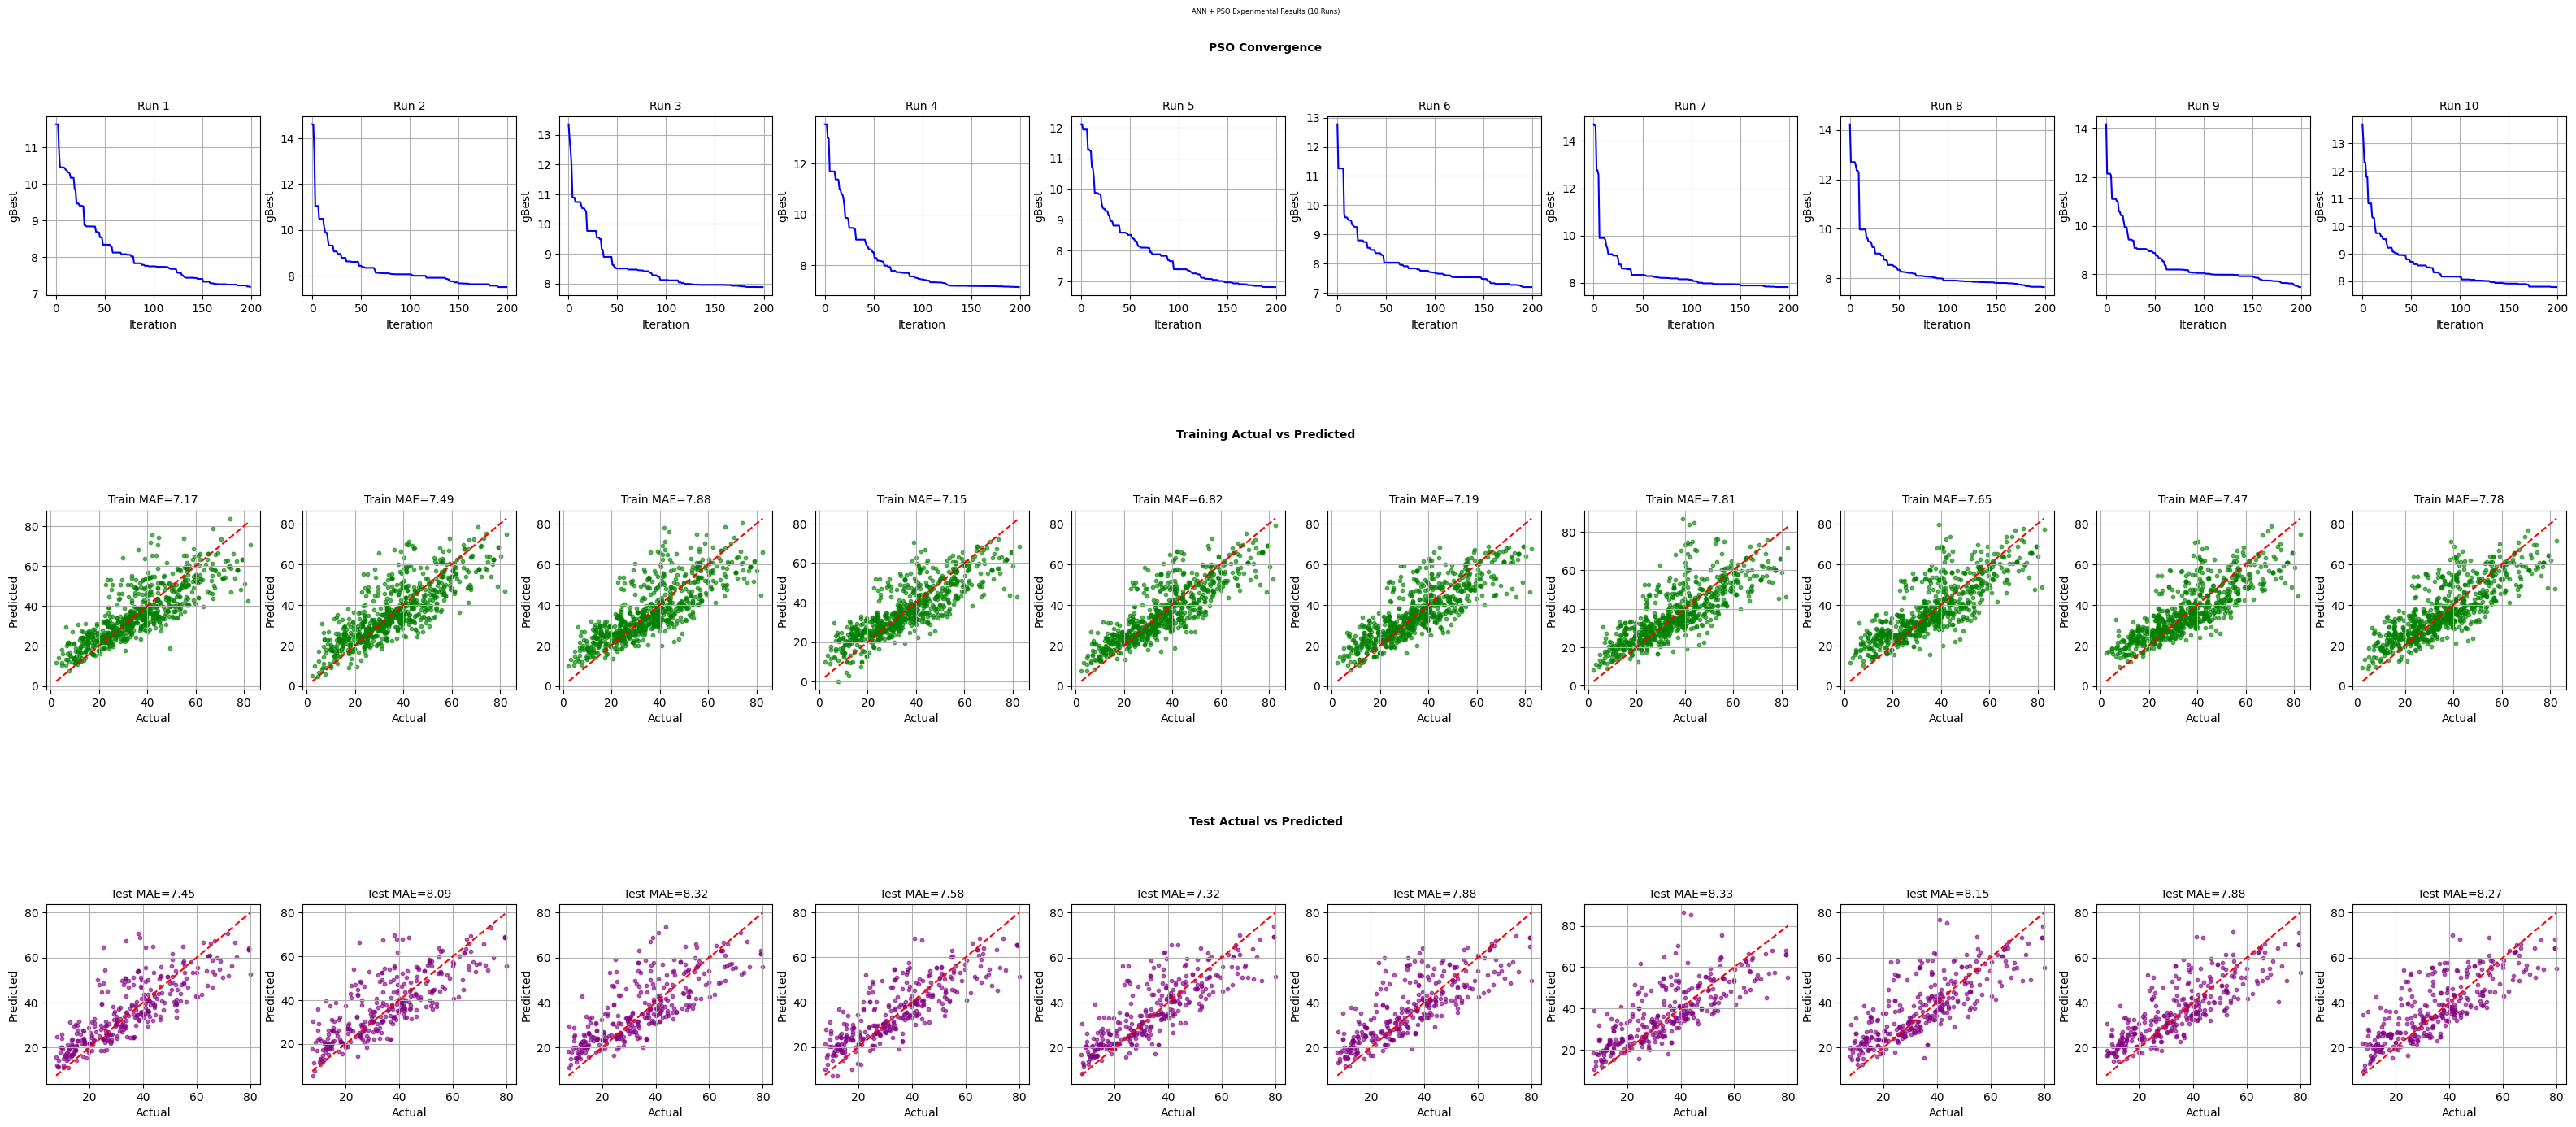


Generating averaged plots across runs...


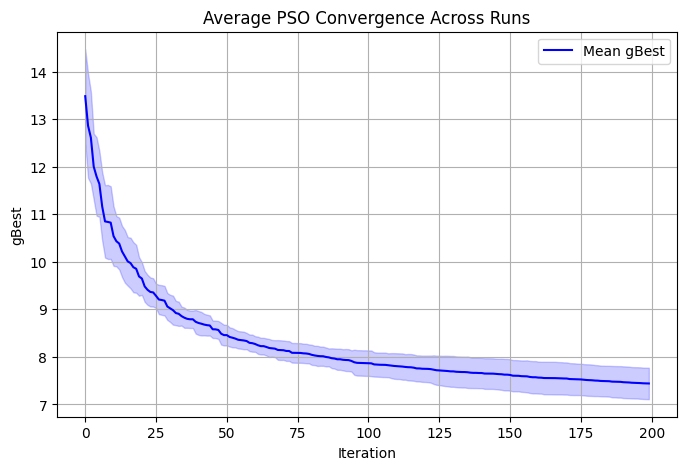

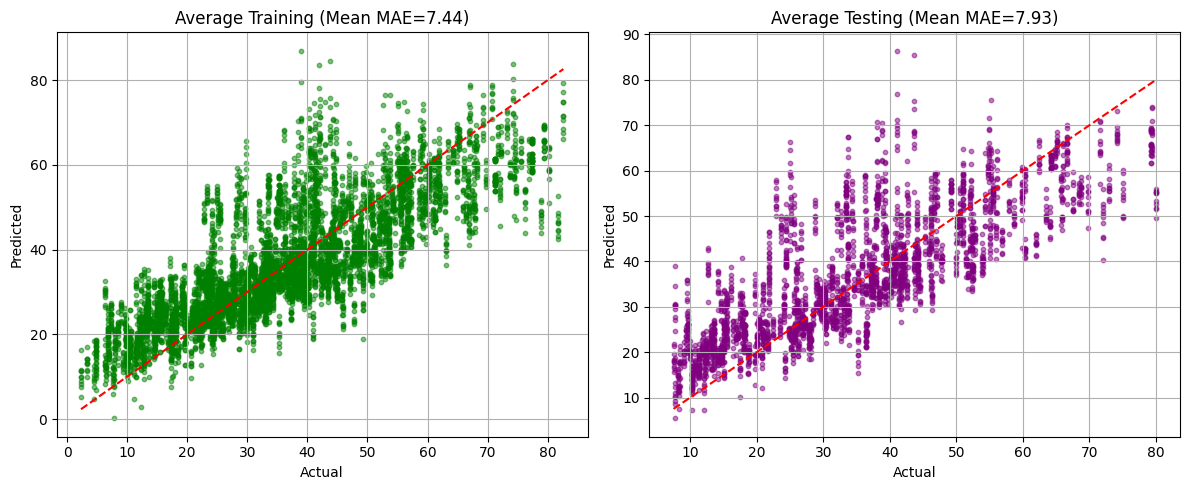

visualization completed.


In [4]:
run_pipeline(ann_config, pso_config,runs=10)

#### **2. Topology - ring Topology**

In [9]:
# PSO CONFIG — baseline
pso_config = PSOConfig(
    topology="ring",        # <-- USE RING TOPOLOGY
    ring_radius=1,
    swarm_size=40,
    iterations=200,
    alpha=0.72,
    beta=1.49,
    gamma=1.49,
    delta=0.0,
    e=1.0,
    bounds=(-5.0, 5.0),
    v_clamp=(-2.0, 2.0),
    k_informants=3, #not use in ring topology
    rewire_every=None,
    boundary_mode="clip",
    seed=None,
    minimize=True,
)


======== EXPERIMENTAL PIPELINE (10 RUNS) ========

 Run 1/10
[PSO] iter 1/200 gbest=15.967432
[PSO] iter 21/200 gbest=9.951011
[PSO] iter 41/200 gbest=8.997095
[PSO] iter 61/200 gbest=8.568736
[PSO] iter 81/200 gbest=8.129413
[PSO] iter 101/200 gbest=7.981448
[PSO] iter 121/200 gbest=7.784949
[PSO] iter 141/200 gbest=7.582314
[PSO] iter 161/200 gbest=7.533030
[PSO] iter 181/200 gbest=7.527575
[PSO] iter 200/200 gbest=7.436902
   gBest=7.4369 | Train MAE=7.4369 | Test MAE=7.7002

 Run 2/10
[PSO] iter 1/200 gbest=13.086238
[PSO] iter 21/200 gbest=8.647646
[PSO] iter 41/200 gbest=8.304018
[PSO] iter 61/200 gbest=8.161221
[PSO] iter 81/200 gbest=8.091164
[PSO] iter 101/200 gbest=8.032776
[PSO] iter 121/200 gbest=7.997392
[PSO] iter 141/200 gbest=7.859803
[PSO] iter 161/200 gbest=7.856799
[PSO] iter 181/200 gbest=7.696376
[PSO] iter 200/200 gbest=7.665308
   gBest=7.6653 | Train MAE=7.6653 | Test MAE=7.9524

 Run 3/10
[PSO] iter 1/200 gbest=13.520753
[PSO] iter 21/200 gbest=8.948870
[PSO] 

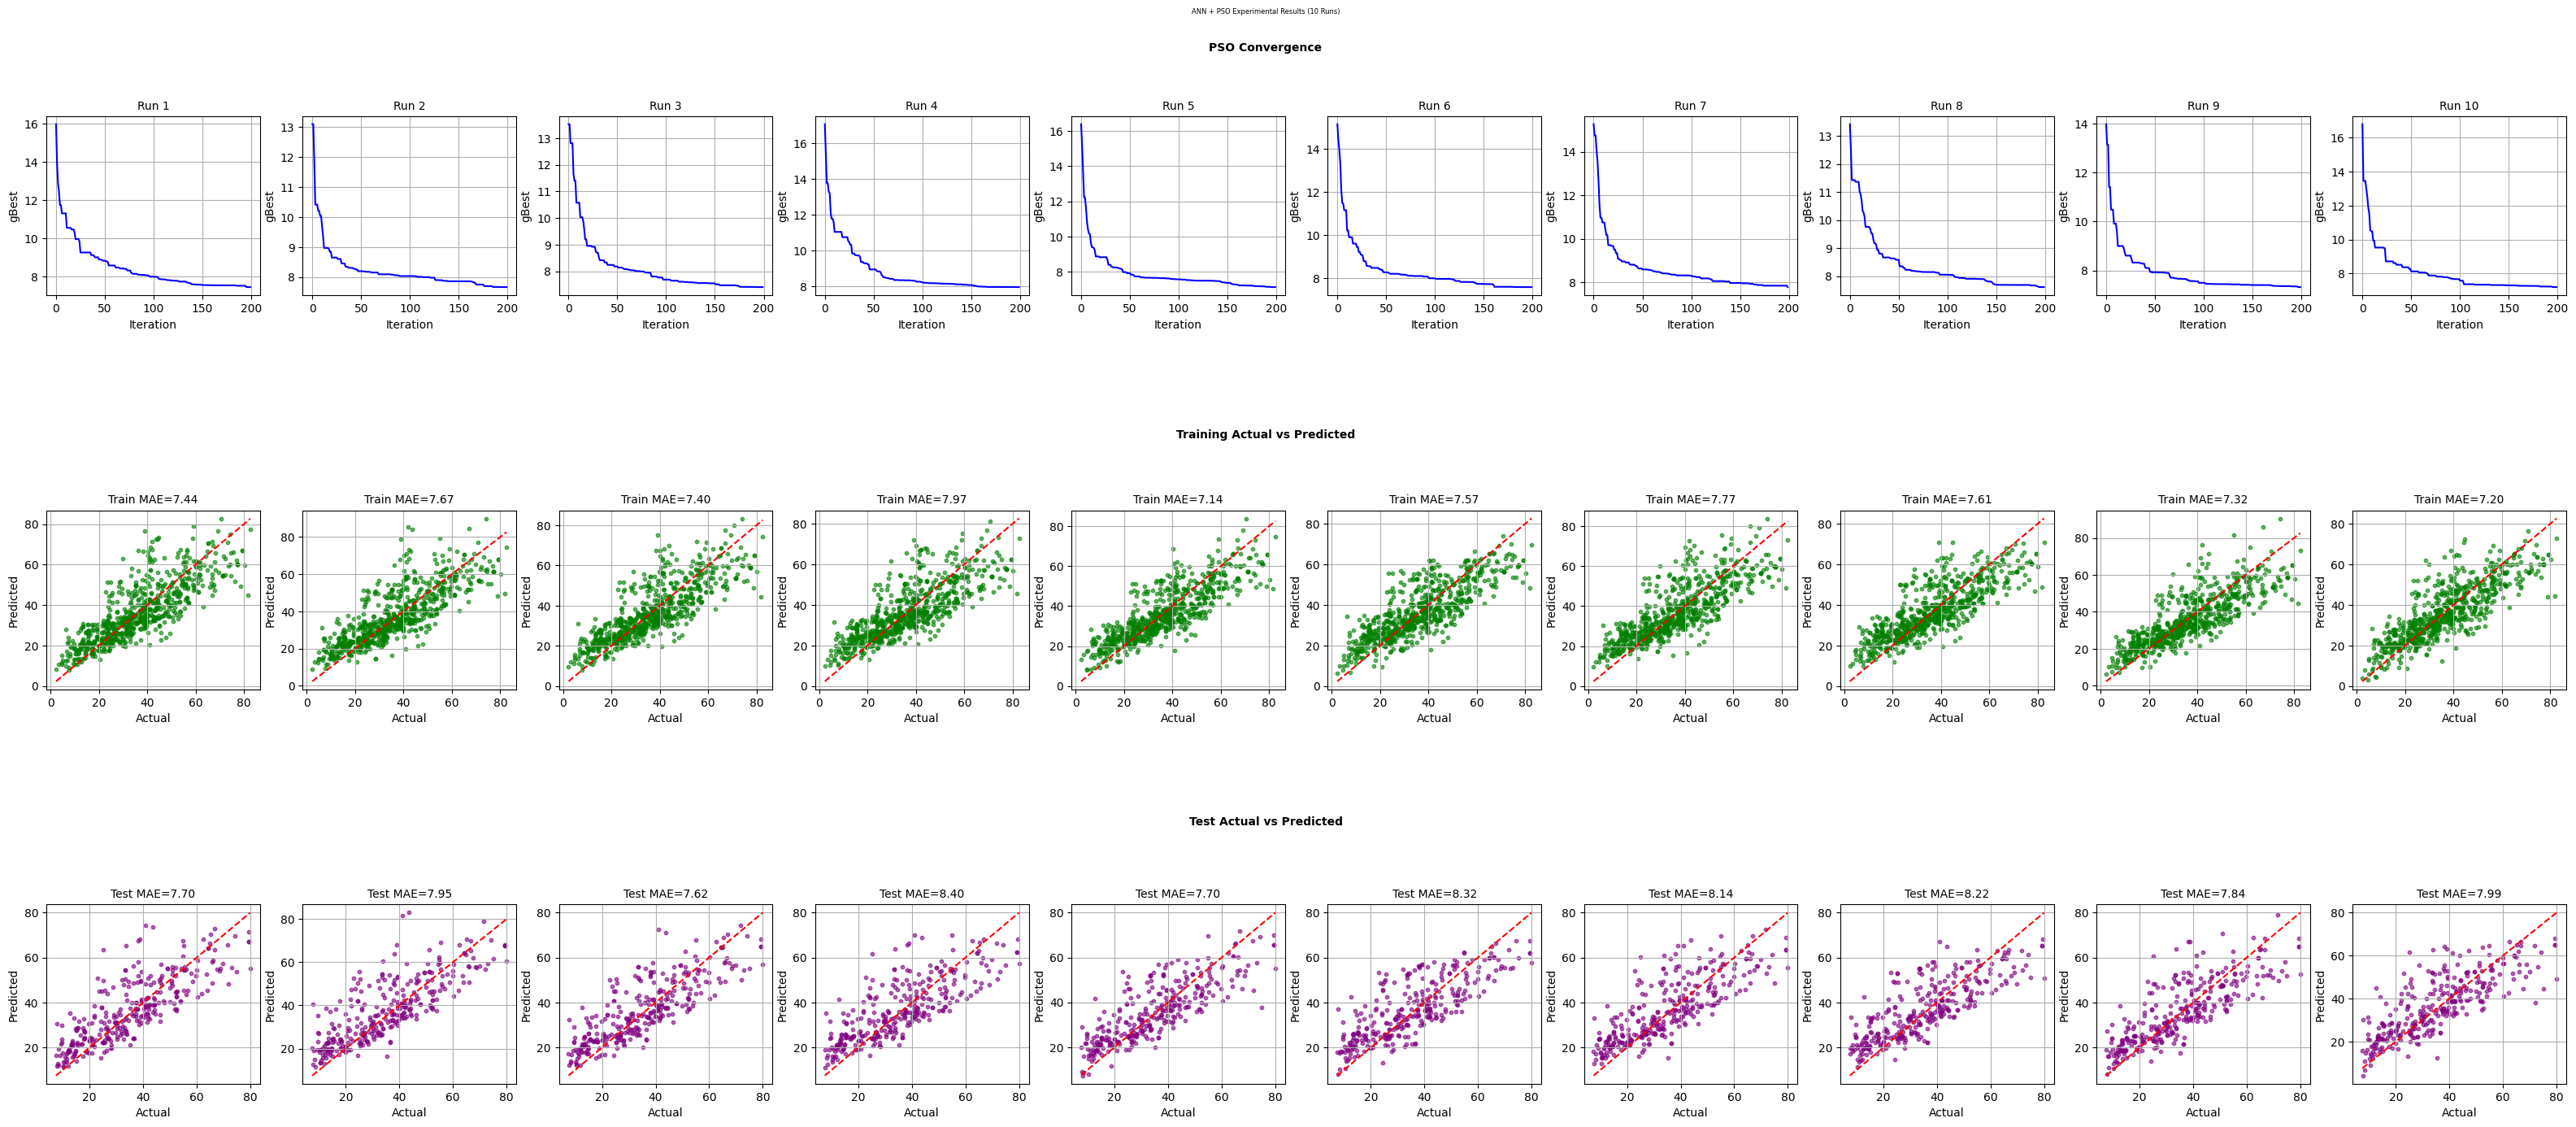


Generating averaged plots across runs...


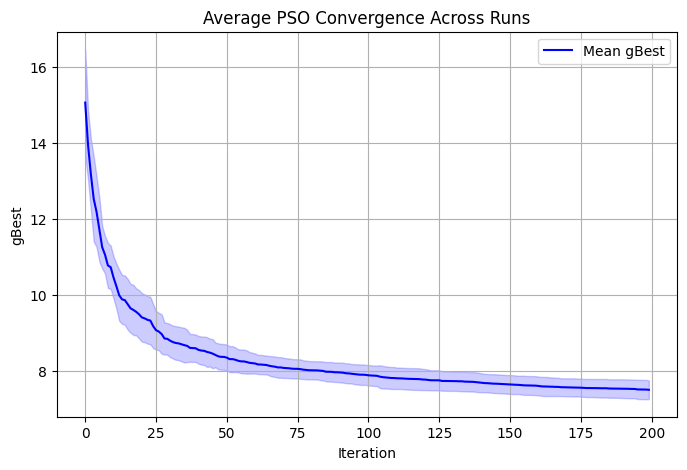

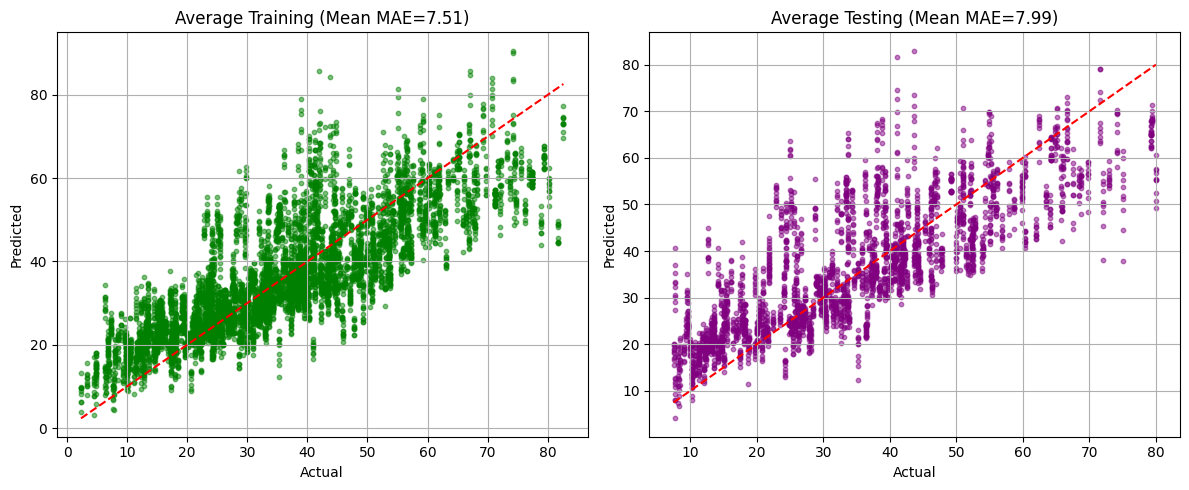

visualization completed.


In [10]:
run_pipeline(ann_config, pso_config,runs=10)

#### **3. Topology - gBest**

In [3]:
# PSO CONFIG — baseline
pso_config = PSOConfig(
    topology="gbest",
    swarm_size=40,
    iterations=200,
    alpha=0.72,
    beta=1.49,
    gamma=1.49,
    delta=0.0,
    e=1.0,
    bounds=(-5.0, 5.0),
    v_clamp=(-1.0, 1.0),
    k_informants=3,
    rewire_every=None,
    boundary_mode="clip",
    seed=None,
    minimize=True,
)


======== EXPERIMENTAL PIPELINE (10 RUNS) ========

 Run 1/10
[PSO] iter 1/200 gbest=15.360357
[PSO] iter 21/200 gbest=9.512397
[PSO] iter 41/200 gbest=8.218395
[PSO] iter 61/200 gbest=8.154668
[PSO] iter 81/200 gbest=7.939145
[PSO] iter 101/200 gbest=7.822203
[PSO] iter 121/200 gbest=7.727291
[PSO] iter 141/200 gbest=7.697496
[PSO] iter 161/200 gbest=7.655311
[PSO] iter 181/200 gbest=7.611738
[PSO] iter 200/200 gbest=7.585951
   gBest=7.5860 | Train MAE=7.5860 | Test MAE=7.9646

 Run 2/10
[PSO] iter 1/200 gbest=11.592713
[PSO] iter 21/200 gbest=9.540282
[PSO] iter 41/200 gbest=8.397865
[PSO] iter 61/200 gbest=7.950078
[PSO] iter 81/200 gbest=7.572990
[PSO] iter 101/200 gbest=7.372440
[PSO] iter 121/200 gbest=7.275208
[PSO] iter 141/200 gbest=7.211870
[PSO] iter 161/200 gbest=7.108866
[PSO] iter 181/200 gbest=7.094924
[PSO] iter 200/200 gbest=7.076287
   gBest=7.0763 | Train MAE=7.0763 | Test MAE=7.6694

 Run 3/10
[PSO] iter 1/200 gbest=14.232708
[PSO] iter 21/200 gbest=10.809498
[PSO]

C:\university\BIC project\F21BC-Coursework\src\train\pipeline.py:170: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[1, 0, 1, 0.94])


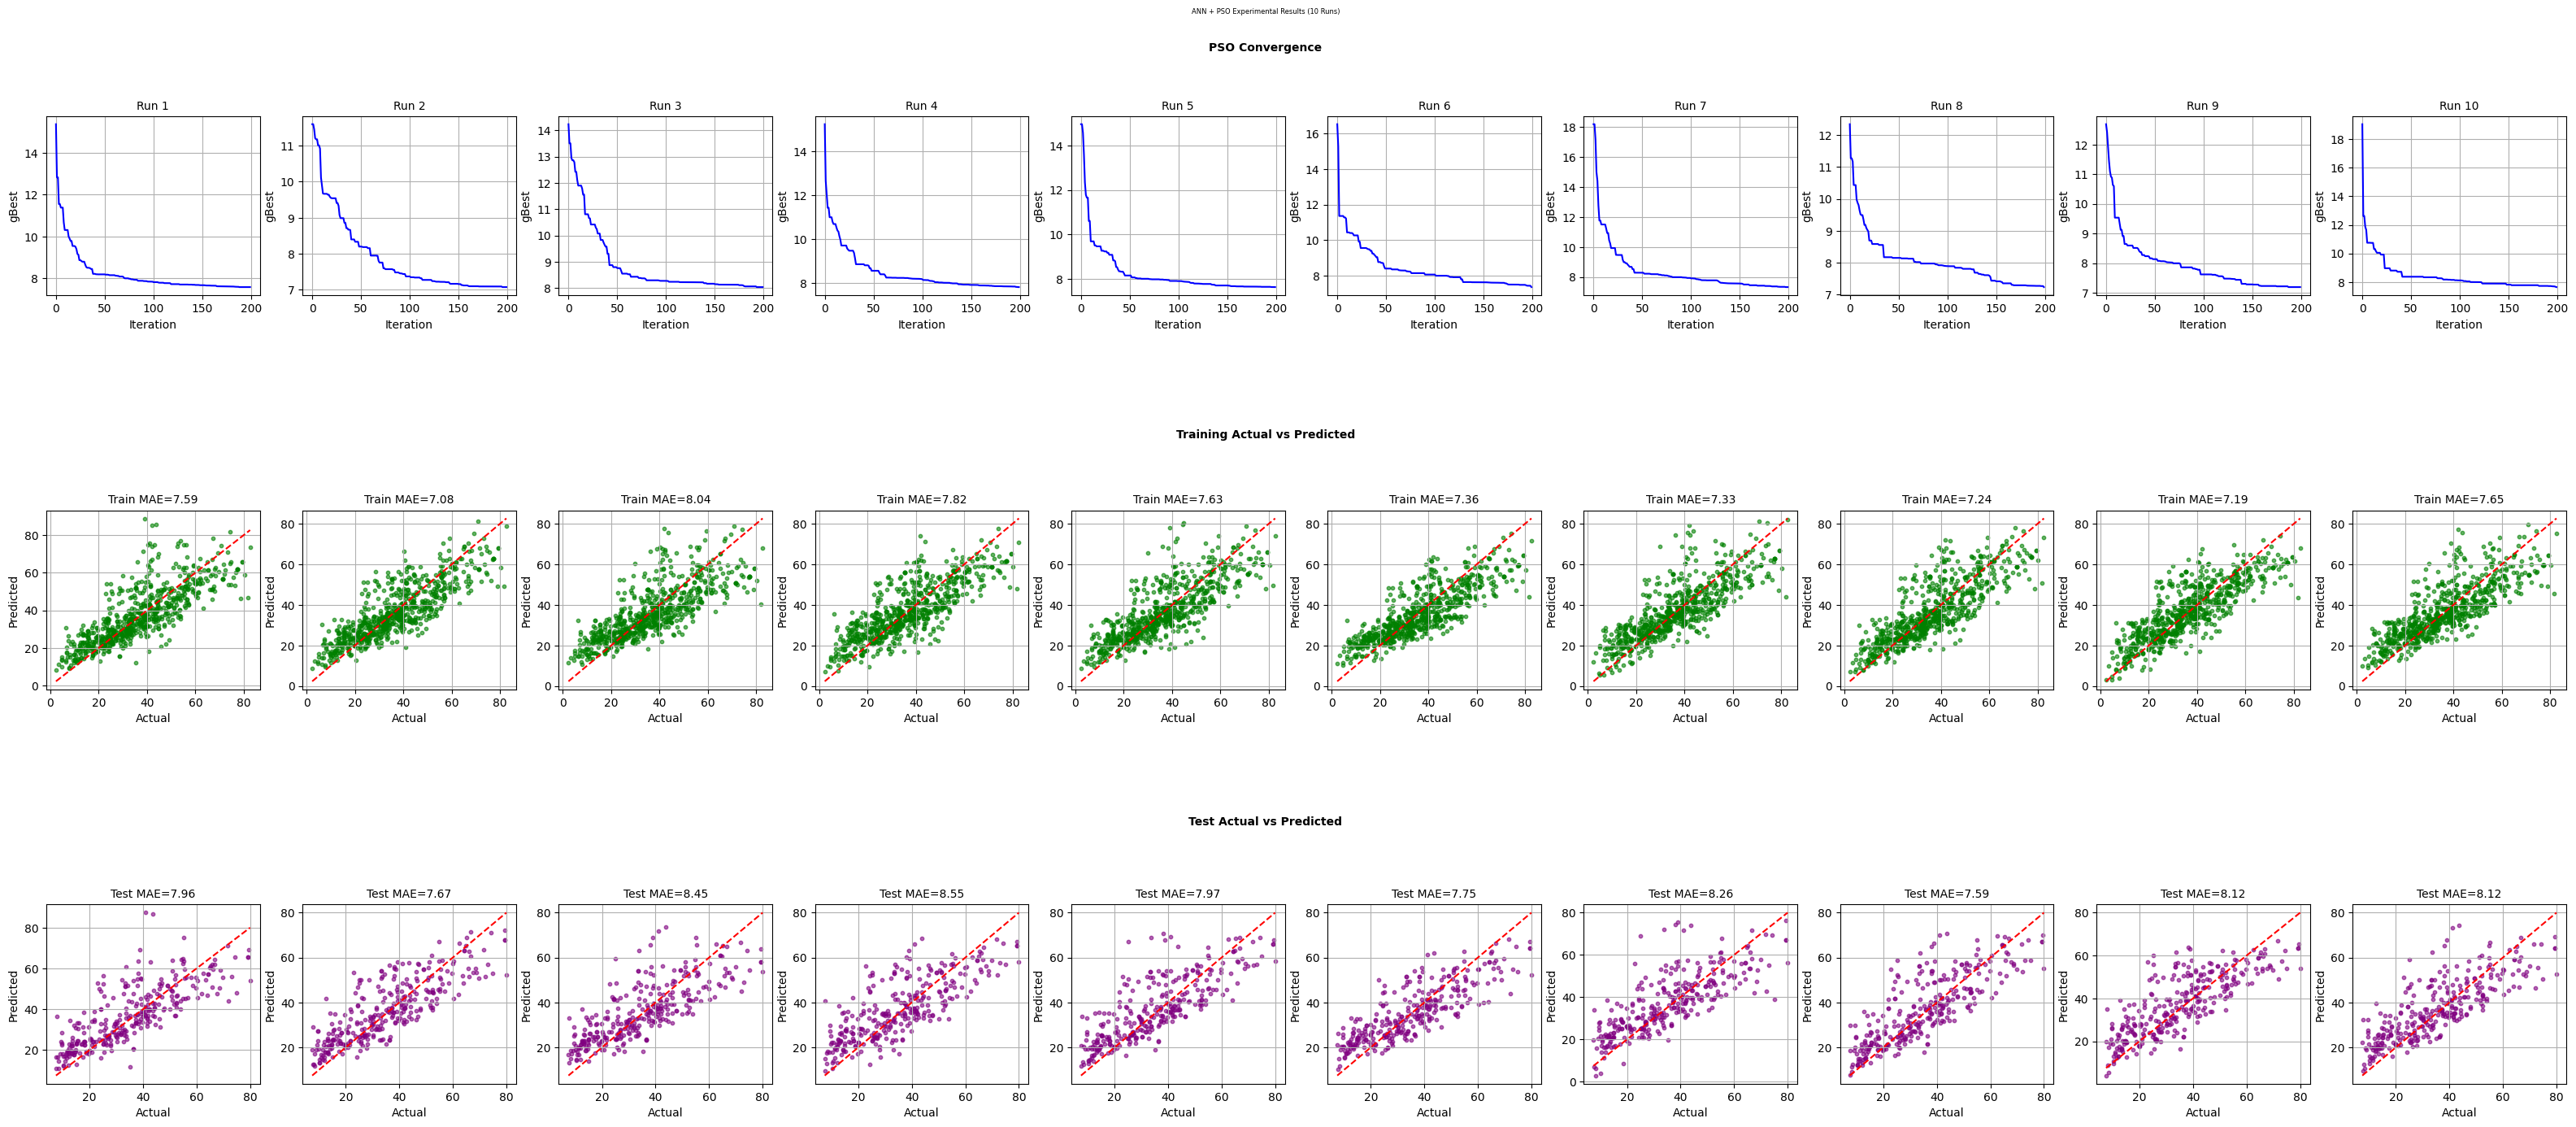


Generating averaged plots across runs...


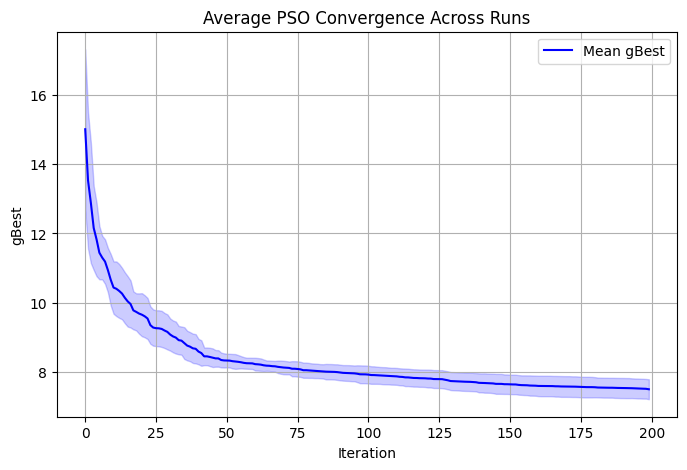

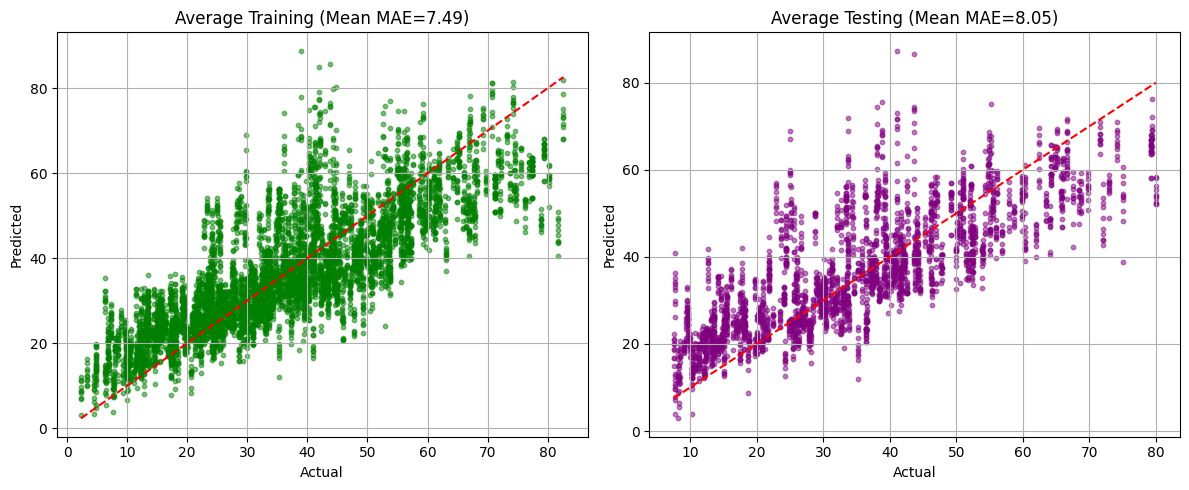

visualization completed.


In [4]:
run_pipeline(ann_config, pso_config,runs=10)

#### **4. Topology - Fully Random**

In [5]:
# PSO CONFIG — baseline
pso_config = PSOConfig(
    topology="fully_random",
    swarm_size=40,
    iterations=200,
    alpha=0.72,
    beta=1.49,
    gamma=1.49,
    delta=0.0,
    e=1.0,
    bounds=(-5.0, 5.0),
    v_clamp=(-5.0, 5.0),
    k_informants=3,
    rewire_every=None,
    boundary_mode="clip",
    seed=None,
    minimize=True,
)


======== EXPERIMENTAL PIPELINE (10 RUNS) ========

 Run 1/10
[PSO] iter 1/200 gbest=12.632058
[PSO] iter 21/200 gbest=8.519092
[PSO] iter 41/200 gbest=8.083347
[PSO] iter 61/200 gbest=8.060560
[PSO] iter 81/200 gbest=7.987386
[PSO] iter 101/200 gbest=7.923531
[PSO] iter 121/200 gbest=7.766966
[PSO] iter 141/200 gbest=7.678840
[PSO] iter 161/200 gbest=7.614033
[PSO] iter 181/200 gbest=7.597838
[PSO] iter 200/200 gbest=7.529719
   gBest=7.5297 | Train MAE=7.5297 | Test MAE=8.2547

 Run 2/10
[PSO] iter 1/200 gbest=14.516234
[PSO] iter 21/200 gbest=9.573656
[PSO] iter 41/200 gbest=8.212727
[PSO] iter 61/200 gbest=7.813244
[PSO] iter 81/200 gbest=7.619075
[PSO] iter 101/200 gbest=7.523158
[PSO] iter 121/200 gbest=7.391286
[PSO] iter 141/200 gbest=7.325905
[PSO] iter 161/200 gbest=7.281013
[PSO] iter 181/200 gbest=7.248526
[PSO] iter 200/200 gbest=7.231360
   gBest=7.2314 | Train MAE=7.2314 | Test MAE=7.5317

 Run 3/10
[PSO] iter 1/200 gbest=14.429874
[PSO] iter 21/200 gbest=9.506363
[PSO] 

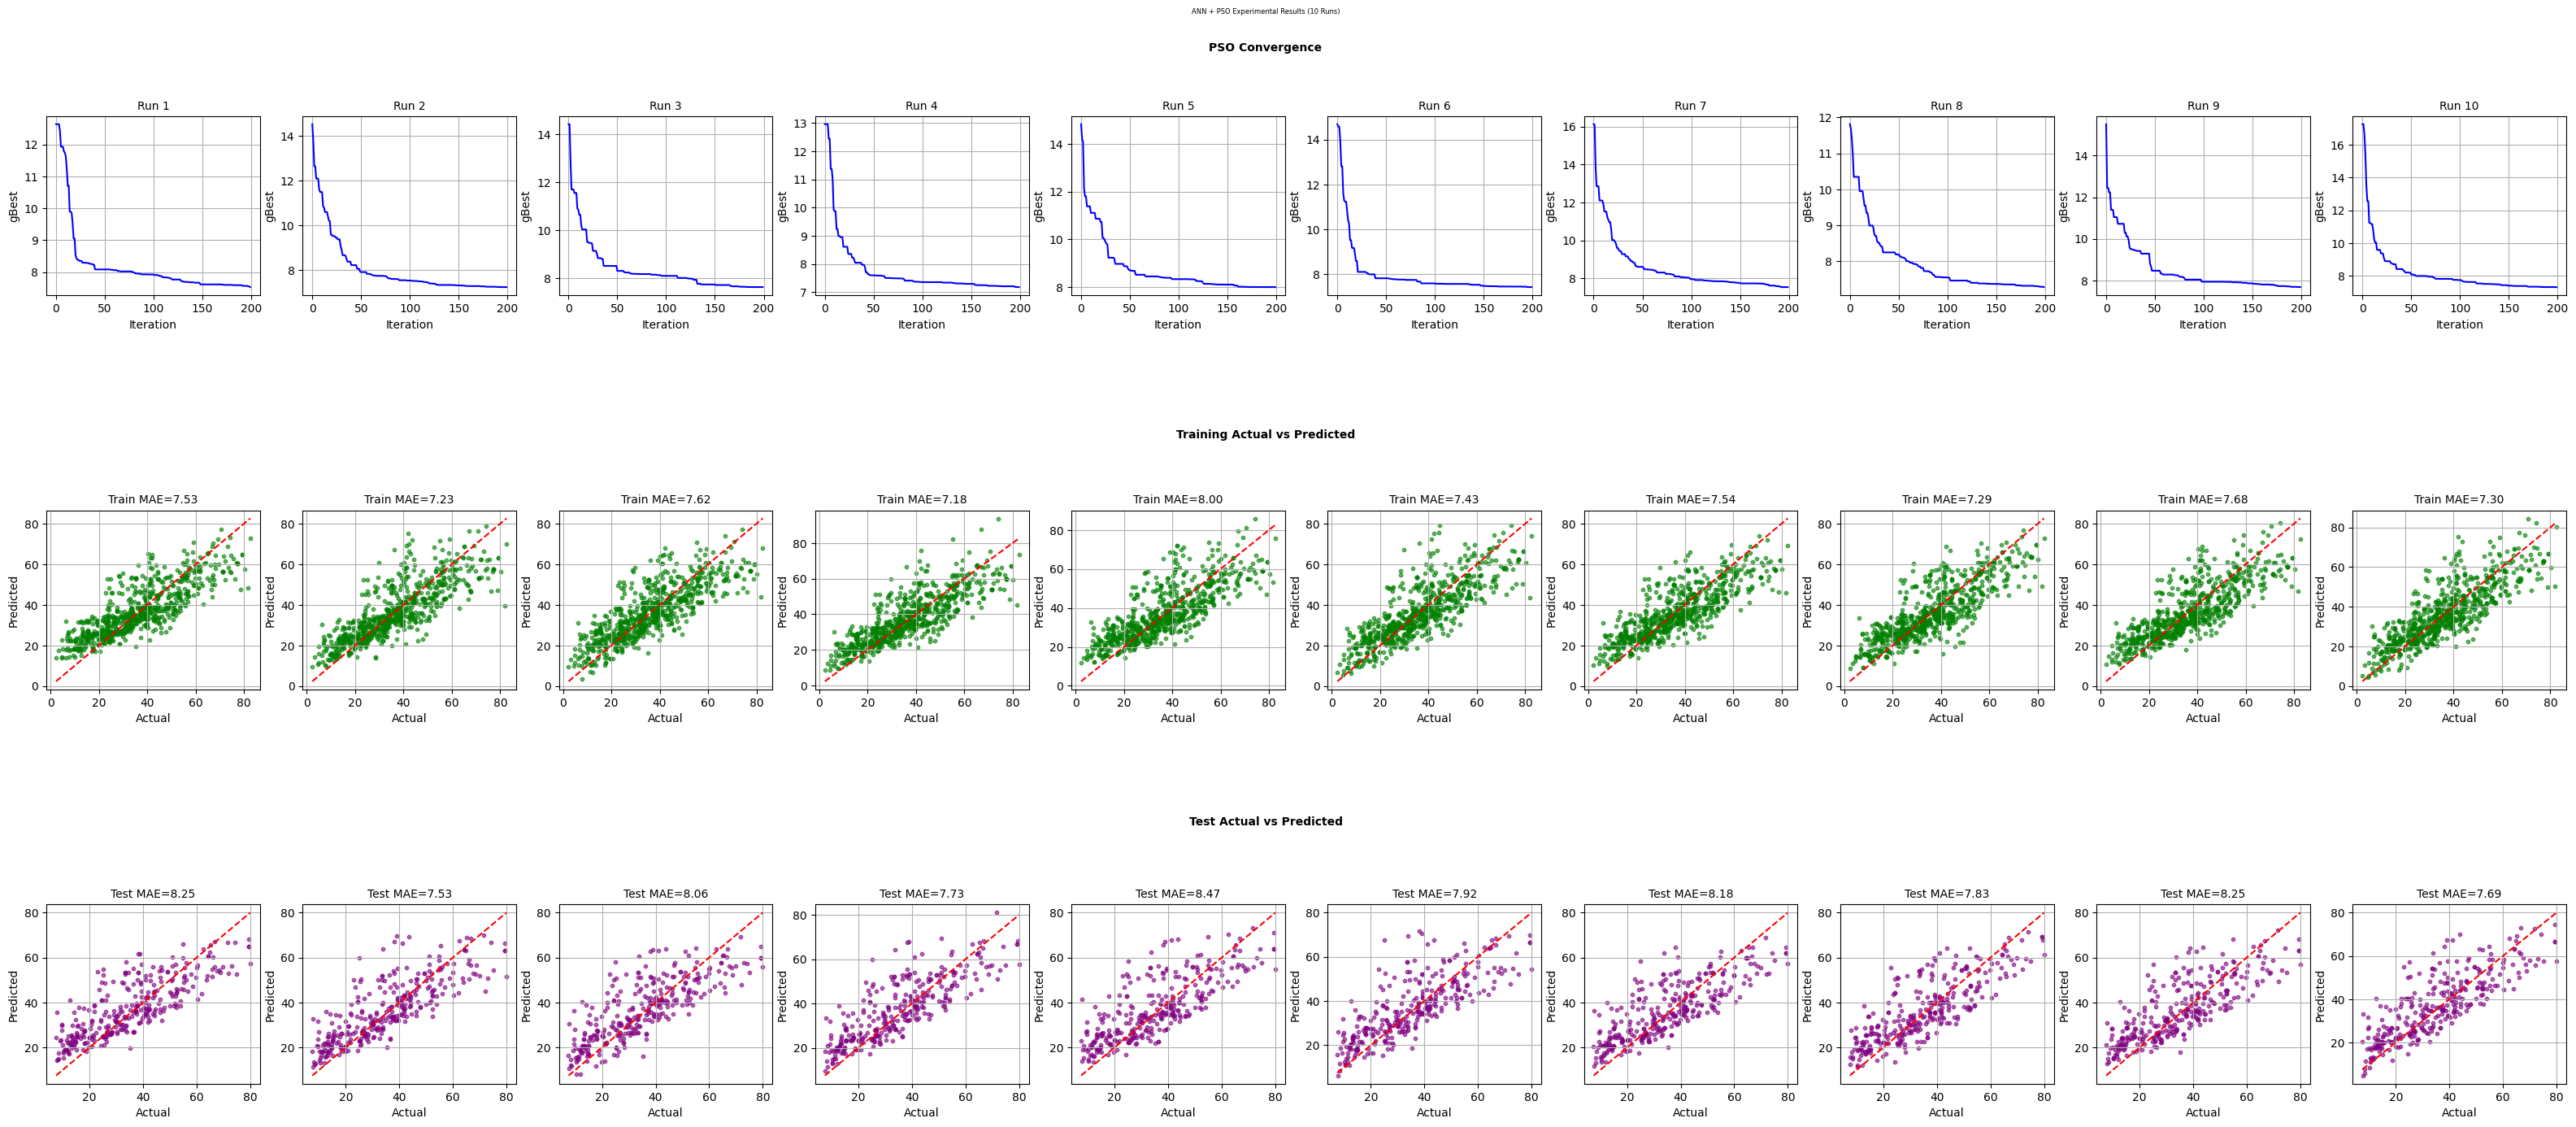


Generating averaged plots across runs...


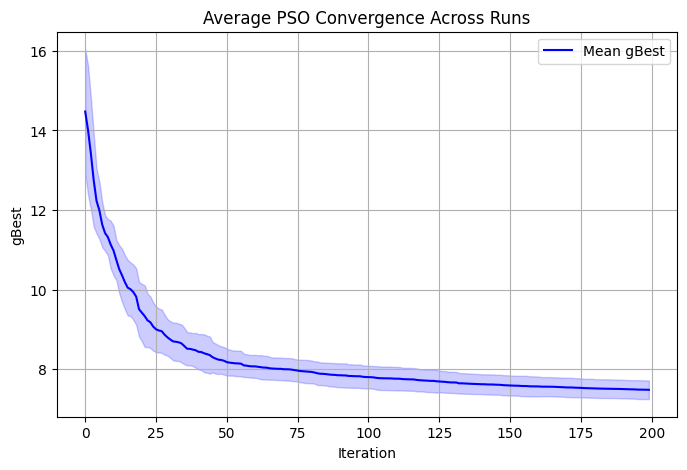

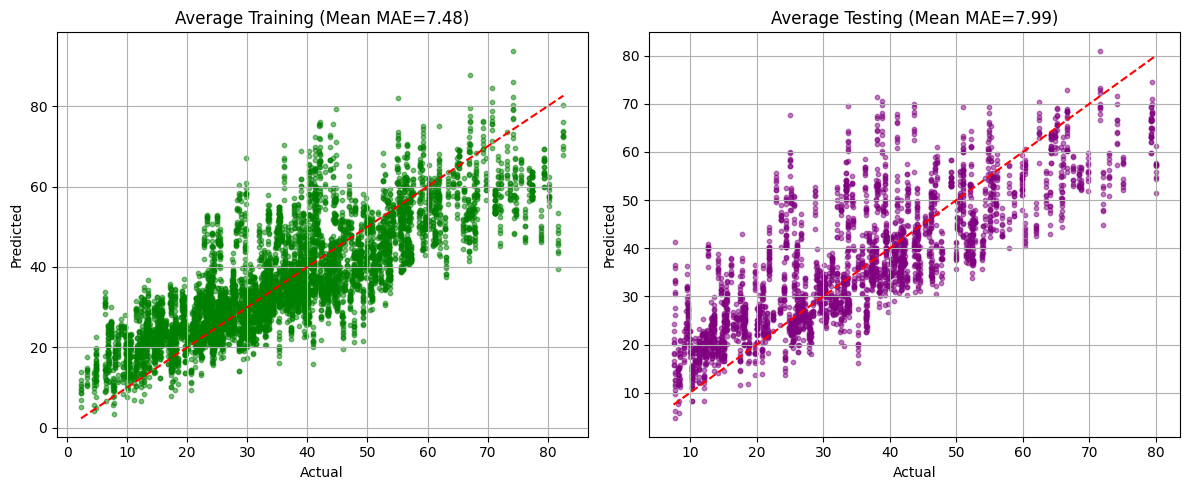

visualization completed.


In [6]:
run_pipeline(ann_config, pso_config,runs=10)

### **Results & Discussion**

| **Topology**            | **Avg gBest (± SD)** | **Avg Train MAE (± SD)** | **Avg Test MAE (± SD)** | **Best?**        |
| ----------------------- | ------------------- | ------------------------ | ----------------------- | ---------------- |
| **Random-k Informants** | **7.4412 ± 0.3312** | **7.4412 ± 0.3312**      | **7.9258 ± 0.3512**     | **Best Overall** |
| **gBest (global best)** | 7.4790 ± 0.2357     | 7.4790 ± 0.2357          | 7.9916 ± 0.2840         | Very Good        |
| **Fully Random**        | 7.5085 ± 0.2466     | 7.5085 ± 0.2466          | 7.9884 ± 0.2607         | Good             |
| **Ring Topology**       | 7.4925 ± 0.2883     | 7.4925 ± 0.2883          | 8.0451 ± 0.3040         | Weakest          |

The choice of PSO topology has a clear effect on convergence behaviour and model accuracy.
Among the four topologies investigated—Random-k, gBest, Fully Random and Ring—the Random-k informants topology achieved the best overall performance, with the lowest average Test MAE (7.93) and a stable gBest average (7.44 ± 0.33).

Random-k works by giving each particle a small, randomly chosen neighbourhood of informants. This improves exploration diversity, prevents swarm collapse, and still allows information sharing across groups. As a result, Random-k avoids the premature convergence observed in the gBest topology, while also maintaining stronger exploitation than the ring topology.
